In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from math import ceil, floor
from matplotlib.colors import LogNorm


In [2]:
fits_filex='hlsp_frontier_model_abell2744_williams_v4_x-pixels-deflect.fits'
fits_filey='hlsp_frontier_model_abell2744_williams_v4_y-pixels-deflect.fits'
img_file='hlsp_frontier_model_abell2744_williams_v4_kappa.fits'
mag_file='hlsp_frontier_model_abell2744_williams_v4_z01-magnif.fits'

In [3]:
hdul = fits.open(fits_filex)
hdul1 = fits.open(fits_filey)
hdul_mag = fits.open(mag_file)
hdul_img = fits.open(img_file)


In [4]:
datax = hdul[0].data

datay = hdul1[0].data

data_img = hdul_img[0].data

array_data = np.zeros((datax.shape[0],datax.shape[1]))
array_data[100:160, 100:160]=datax[100:160, 100:160]

data_mag = hdul_mag[0].data
hdul.close()
hdul1.close()
hdul_img.close()


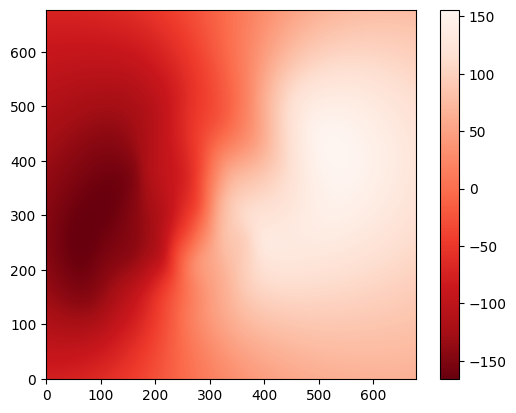

In [5]:


plt.imshow(datax, cmap='Reds_r')
plt.gca().invert_yaxis()
plt.colorbar()

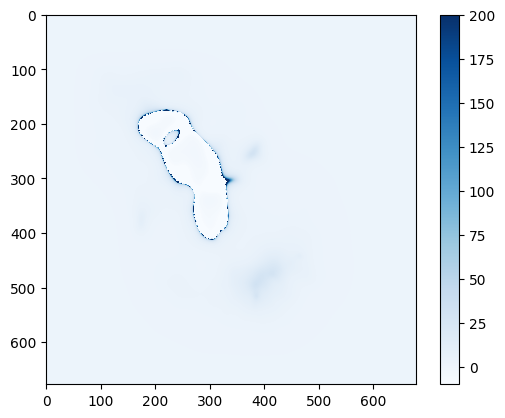

In [6]:
plt.imshow(data_mag, cmap='Blues',vmin=-10, vmax=200)

plt.colorbar()


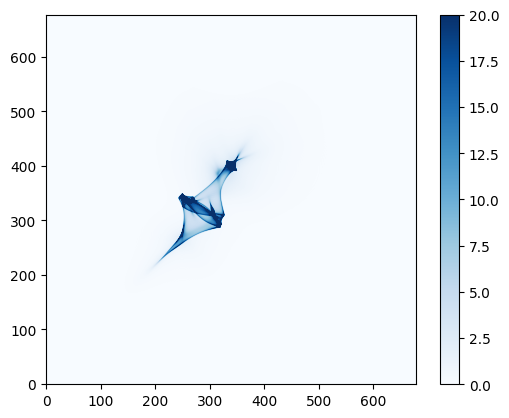

In [7]:
array_test = np.zeros((datax.shape[0],datax.shape[1]))
for i in range(0,678):
    for j in range(0,678):
        ycoord = i-datay[i,j]
        xcoord = j-datax[i,j]
        ydec = ycoord%1
        xdec = xcoord%1
        array_test[ceil(ycoord),ceil(xcoord)] += data_img[i,j]*ydec*xdec
        array_test[ceil(ycoord),floor(xcoord)] += data_img[i,j]*ydec*(1-xdec)
        array_test[floor(ycoord),ceil(xcoord)] += data_img[i,j]*(1-ydec)*xdec
        array_test[floor(ycoord),floor(xcoord)] += data_img[i,j]*(1-ydec)*(1-xdec)

plt.imshow(array_test, cmap='Blues', vmax=20)
plt.colorbar()
plt.gca().invert_yaxis()

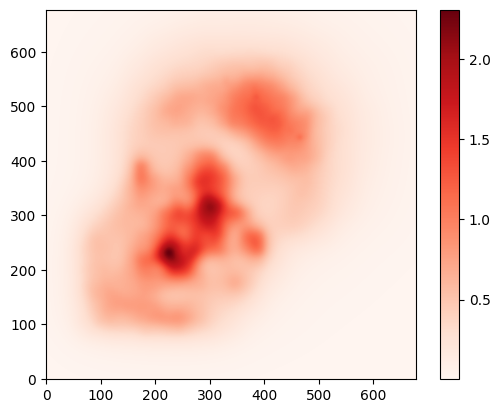

In [8]:
plt.imshow(data_img, cmap='Reds')
plt.colorbar()
plt.gca().invert_yaxis()

In [9]:
#checking the vaildity of the source plane map
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from lenstronomy.LensModel.convergence_integrals import deflection_from_kappa_grid 

# import the LensModel class #
from lenstronomy.LensModel.lens_model import LensModel

# specify the choice of lens models #
lens_model_list = ['SIE']

# setup lens model class with the list of lens models #
lensModel = LensModel(lens_model_list=lens_model_list)

# define parameter values of lens models #
kwargs_sie = {'theta_E': 100, 'e1':0, 'e2':0.4, 'center_x': 280, 'center_y': 320}
kwargs_lens = [kwargs_sie]
'''kwargs_epl = {'theta_E': 50, 'gamma': 2, 'e1': 0.1, 'e2': 0.1, 'center_x': 300, 'center_y': 300}
kwargs_lens = [kwargs_epl]'''
# image plane coordinate #
x_grid, y_grid = np.meshgrid(np.linspace(0, 679, 680), np.linspace(0, 679, 680))

# Flatten the grid for calculations
x_flat = x_grid.flatten()
y_flat = y_grid.flatten()

# Calculate convergence (kappa)
kappa = lensModel.kappa(x_flat, y_flat, kwargs_lens)

# Reshape back to 2D grid
# kappa_2d = kappa.reshape(x_grid.shape)
# ray-tracing to the source plane
beta_x, beta_y = lensModel.ray_shooting(x_flat, y_flat, kwargs_lens)

# make beta_x and beta_y 2d
beta_x_2d = beta_x.reshape(x_grid.shape)
beta_y_2d = beta_y.reshape(x_grid.shape)
diffx= x_grid - beta_x_2d
diffy= y_grid - beta_y_2d


#plt.imshow(diffx, cmap='Blues')

#plt.colorbar()


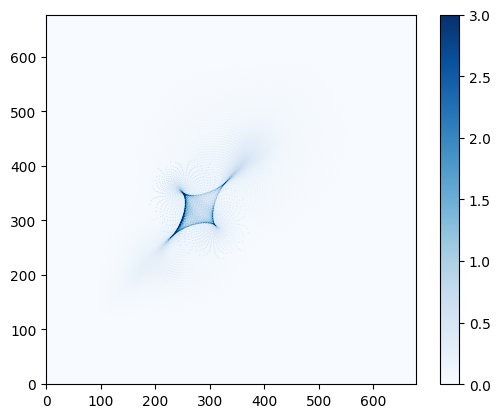

In [10]:
array_test2 = np.zeros((datax.shape[0],datax.shape[1]))
xcoords=[]
ycoords=[]
for i in range(0, 677):
    for j in range(0, 677):
      if i%3==0 and j%3==0:
        ycoord = i-diffy[i,j]
        xcoord = j-diffx[i,j]
        if ycoord<0 or ycoord>677 or xcoord<0 or xcoord>677:
            continue
        ydec = ycoord%1
        xdec = xcoord%1
        array_test2[ceil(ycoord),ceil(xcoord)] += data_img[i,j]*ydec*xdec
        array_test2[ceil(ycoord),floor(xcoord)] += data_img[i,j]*ydec*(1-xdec)
        array_test2[floor(ycoord),ceil(xcoord)] += data_img[i,j]*(1-ydec)*xdec
        array_test2[floor(ycoord),floor(xcoord)] += data_img[i,j]*(1-ydec)*(1-xdec)
        xcoords.append(xcoord)
        ycoords.append(ycoord)

plt.imshow(array_test2, cmap='Blues',vmax=3)
plt.gca().invert_yaxis()
plt.colorbar()


(0.0, 600.0)

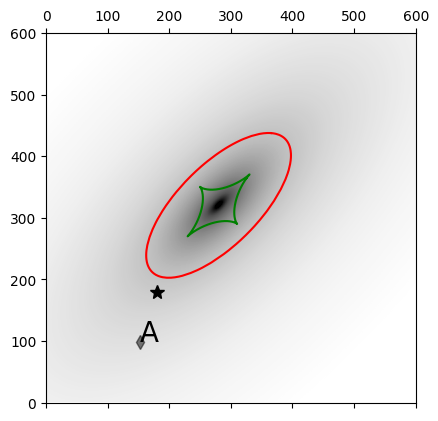

In [11]:
from lenstronomy.Plots import lens_plot

f, ax = plt.subplots()
src_x, src_y = 180,180

lens_plot.lens_model_plot(ax, lensModel=lensModel, kwargs_lens=kwargs_lens,numPix=5000, deltaPix=0.25, sourcePos_x=src_x, sourcePos_y=src_y, point_source=True, with_caustics=True, fast_caustic=True, coord_inverse=True)
# make the plot to have 679x679 pixels
plt.xlim(0,600)
plt.ylim(0,600)